# GSTN Hackathon 2024 - EDA only

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df_X_train = pd.read_csv("../input/Train_60/X_Train_Data_Input.csv")
df_y_train = pd.read_csv("../input/Train_60/Y_Train_Data_Target.csv")
df_X_test = pd.read_csv("../input/Test_20/X_Test_Data_Input.csv")
df_y_test = pd.read_csv("../input/Test_20/Y_Test_Data_Target.csv")

In [5]:
# Add target
df_train = df_X_train.merge(df_y_train, on="ID")
df_test = df_X_test.merge(df_y_test, on="ID")
del df_X_train, df_y_train, df_X_test, df_y_test

## EDA

I'll impute 'Column0' with the most frequent value.

In [9]:
df_train["Column0"].value_counts()

Column0
0.0     629558
2.0      73595
1.0      56021
4.0       6296
5.0       6277
6.0       5998
7.0       4156
3.0       1605
9.0        540
8.0        386
11.0       328
12.0       161
15.0        78
14.0        66
13.0        22
10.0        17
16.0        10
18.0         6
17.0         4
Name: count, dtype: int64

In [10]:
most_frequent_val_col0 = df_train['Column0'].value_counts().index[0]
df_train.loc[df_train['Column0'].isna(), 'Column0'] = most_frequent_val_col0

<Axes: >

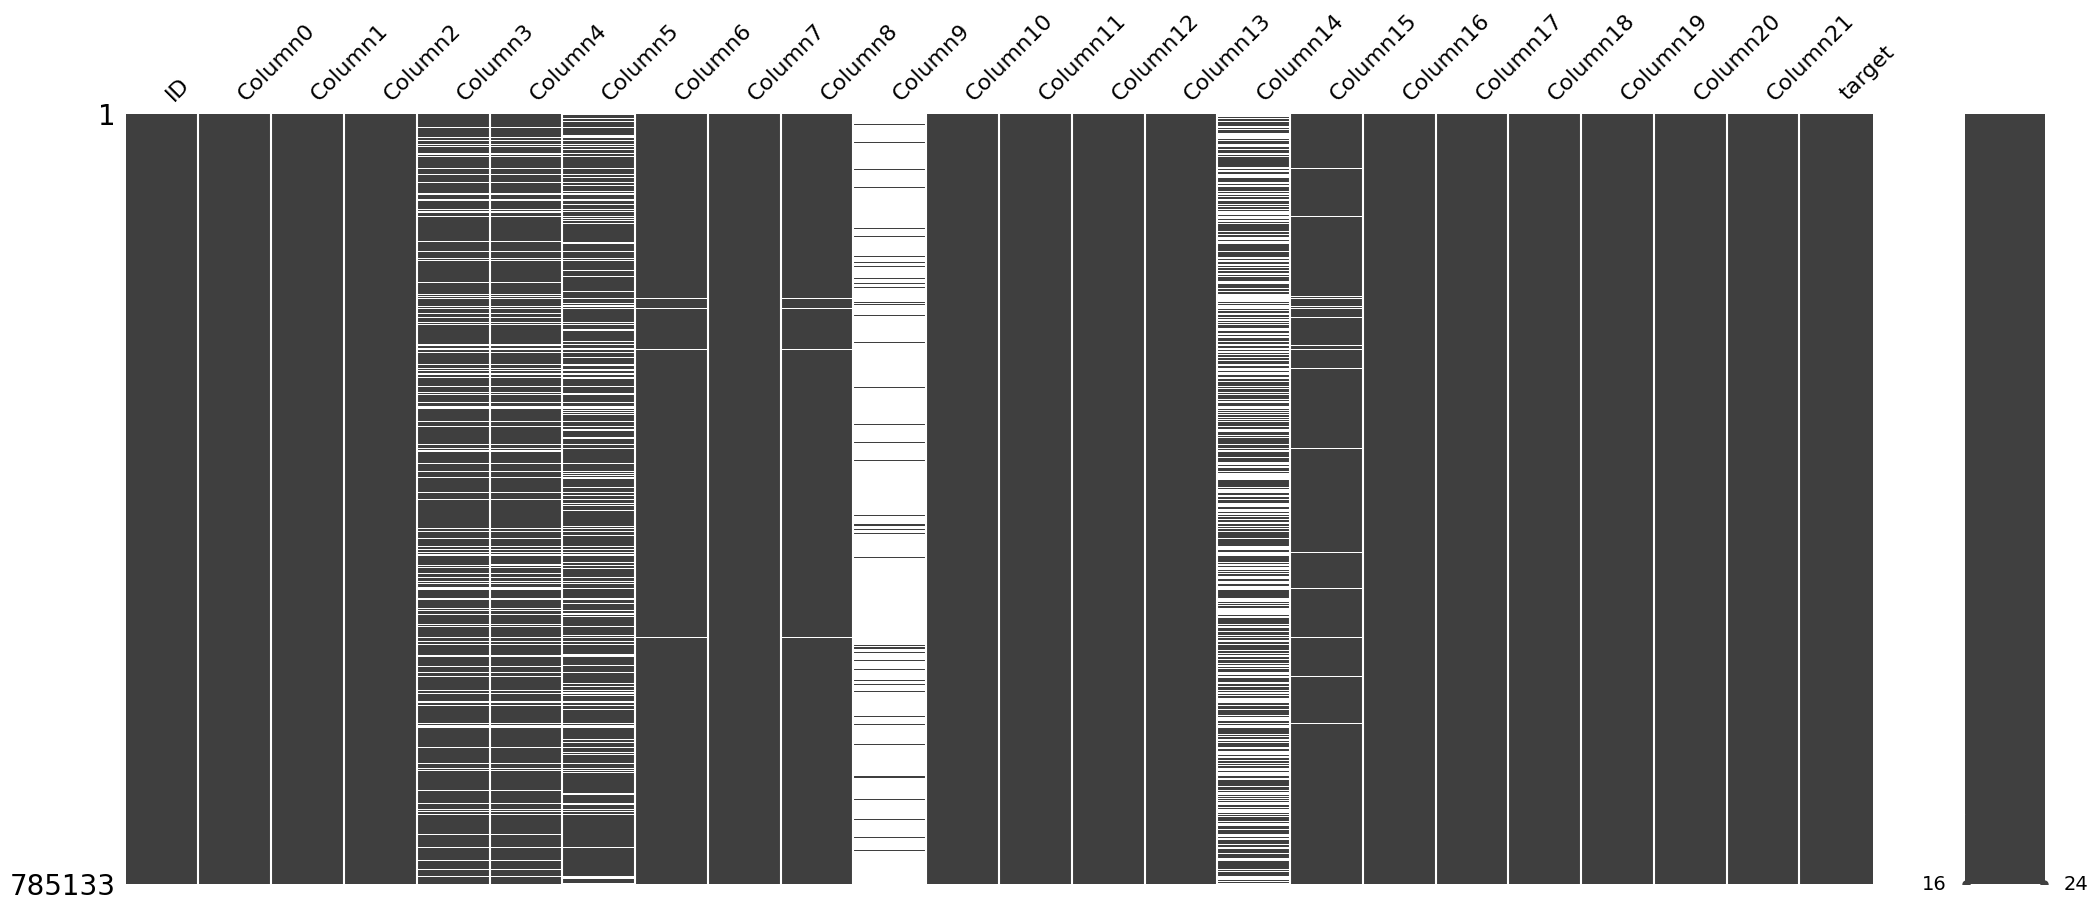

In [11]:
msno.matrix(df_train)

<Axes: >

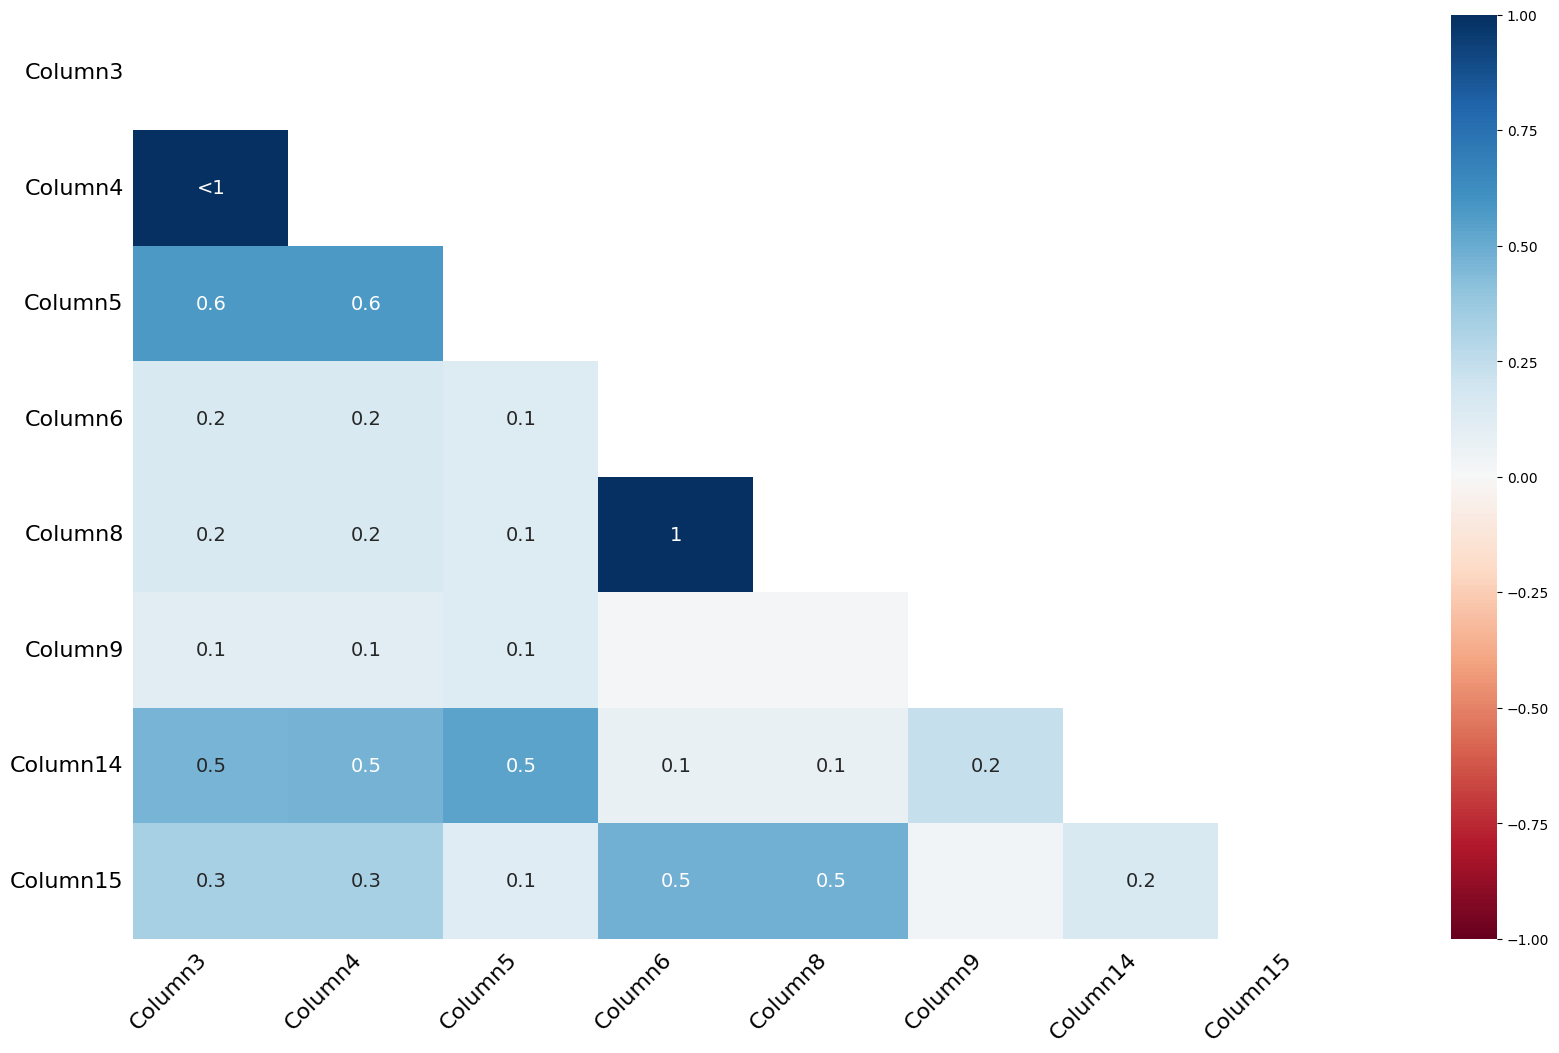

In [12]:
msno.heatmap(df_train)

'Column6' and 'Column8' seems to be recorded together, and

'Column3' and 'Column4' seems to be recorded together.

In [21]:
47 * 47

2209

In [25]:
(df_train["Column4"].astype(str) + "-" + df_train["Column3"].astype(str)).nunique() / (47 * 47)

1432

Let's see Column9

In [13]:
df_train["Column9"].describe()

count    52996.000000
mean         0.005245
std          1.111058
min         -0.088554
25%         -0.086503
50%         -0.081820
75%         -0.063140
max        133.911803
Name: Column9, dtype: float64

In [14]:
q = 89.54
print(f"Column9 value at {q} percentile: {np.nanpercentile(df_train["Column9"].values, q)}")
q = 99.77
print(f"Column9 value at {q} percentile: {np.nanpercentile(df_train["Column9"].values, q)}")

Column9 value at 89.54 percentile: 6.960692623969852e-05
Column9 value at 99.77 percentile: 5.200920025954512


In column 9, almost 90% of the values are below 0 and only 0.23% of the values are above 5. The distribution looks quite skewed. Let's plot the histogram to check.

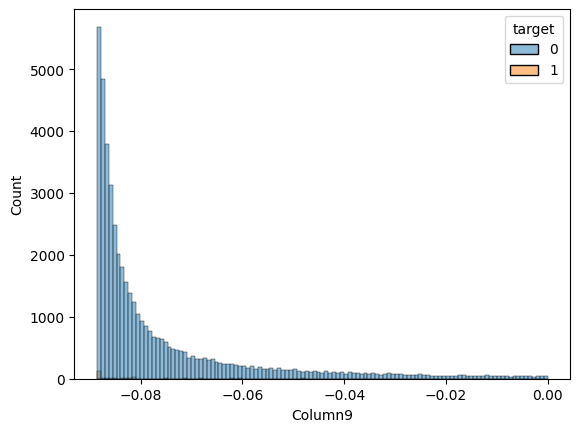

In [15]:
sns.histplot(data=df_train.loc[df_train["Column9"]<0], x="Column9", hue="target")
plt.show()

In [16]:
# Make 3 categories to check its relationship with target
df_train["column9_category"] = "NA"
df_train.loc[(df_train["Column9"]<0), "column9_category"] = "x<0"
df_train.loc[(df_train["Column9"]>=0) & (df_train["Column9"]<5), "column9_category"] = "0<=x<5"
df_train.loc[(df_train["Column9"]>=5), "column9_category"] = "x>=5"
print(pd.crosstab(df_train["column9_category"], df_train["target"]).to_markdown())
del df_train["column9_category"];

| column9_category   |      0 |     1 |
|:-------------------|-------:|------:|
| 0<=x<5             |   5367 |    54 |
| NA                 | 658471 | 73666 |
| x<0                |  47136 |   313 |
| x>=5               |    126 |     0 |


Clearly, as the value of column 9 is increasing, the probability of target is reducing and furthermore, when it is >=5, then there is no positive target class. Thus, it can potentially provide information to the model. We cannot impute singular value in it. A log-transformation seems to be a good choice.

Similarily, let's see column 14 now

In [17]:
df_train["Column14"].describe()

count    419430.000000
mean         -0.000863
std           1.291202
min        -832.749615
25%           0.001351
50%           0.001351
75%           0.001351
max           8.514416
Name: Column14, dtype: float64

In [18]:
# Make categories to check its relationship with target
df_train["column14_category"] = "NA"
df_train.loc[(df_train["Column14"]<-0.01), "column14_category"] = "x<-0.01"
df_train.loc[(df_train["Column14"]>=-0.01) & (df_train["Column14"]<0), "column14_category"] = "-0.01<=x<0"
df_train.loc[(df_train["Column14"]>=0) & (df_train["Column14"]<0.01), "column14_category"] = "0<=x<0.01"
df_train.loc[(df_train["Column14"]>=0.01), "column14_category"] = "x>=0.01"
print(pd.crosstab(df_train["column14_category"], df_train["target"]).to_markdown())
del df_train["column14_category"];

| column14_category   |      0 |     1 |
|:--------------------|-------:|------:|
| -0.01<=x<0          |     88 |     3 |
| 0<=x<0.01           | 406172 | 12975 |
| NA                  | 304650 | 61053 |
| x<-0.01             |     99 |     2 |
| x>=0.01             |     91 |     0 |


Most of the values in column 14 are concentrated near zero, other values |x|>1 seems to be outliers

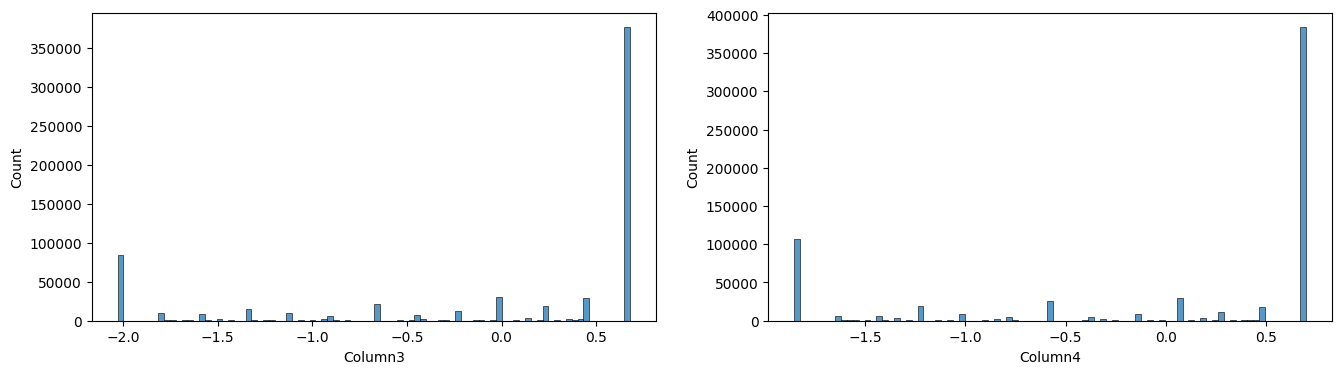

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,4))

sns.histplot(df_train, x="Column3", ax=ax[0])
sns.histplot(df_train, x="Column4", ax=ax[1])
plt.show()

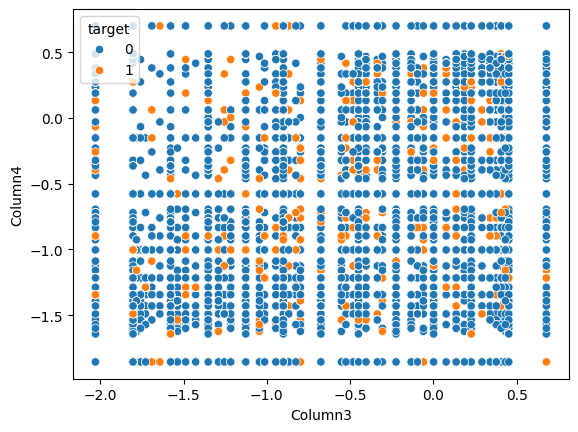

In [20]:
sns.scatterplot(df_train, x="Column3", y="Column4", hue="target")
plt.show()

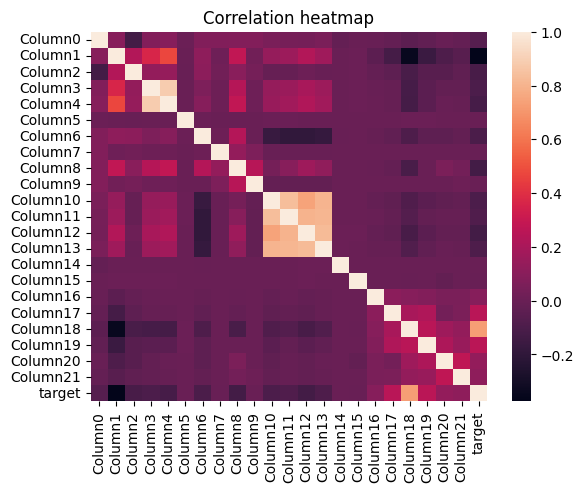

In [21]:
sns.heatmap(df_train.drop(columns=["ID"]).corr())
plt.title("Correlation heatmap")
plt.show()

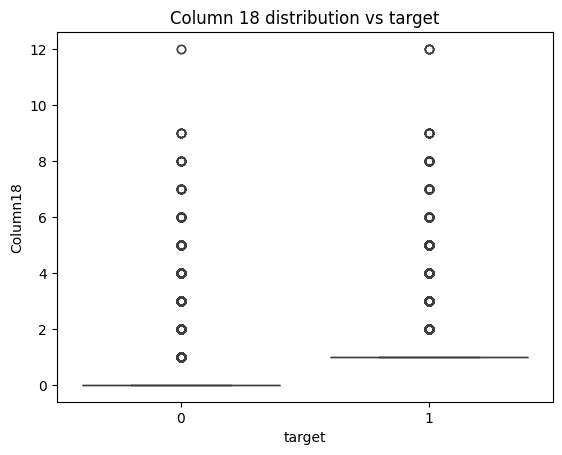

In [22]:
sns.boxplot(data=df_train, x="target", y="Column18")
plt.title("Column 18 distribution vs target")
plt.show()

In [23]:
pd.crosstab(df_train["target"], df_train["Column18"])

Column18,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,12.0
target,,,,,,,,,,,
0,682726,25293,2145,526,199,100,53,28,20,8,2
1,0,68309,4076,982,311,156,75,52,48,19,5


Clearly! When Column18==0, then target is always 0.

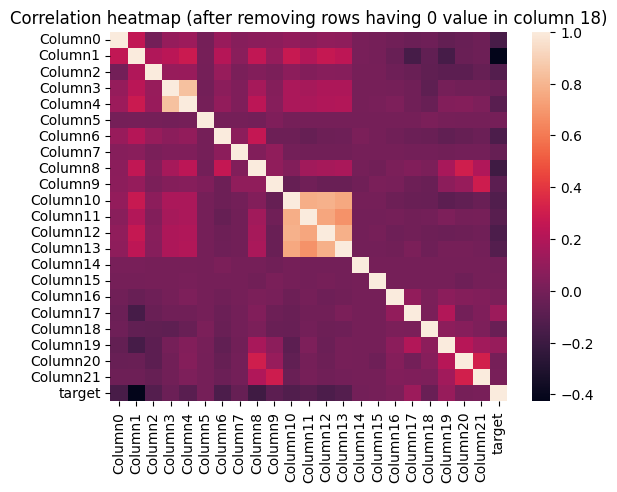

In [24]:
sns.heatmap(df_train[df_train["Column18"]!=0].drop(columns=["ID"]).corr())
plt.title("Correlation heatmap (after removing rows having 0 value in column 18)")
plt.show()

In [25]:
def get_constant_imputation_value(column):
    neg_df = df_train.loc[df_train['target'] == 0, column]
    pos_df = df_train.loc[df_train['target'] == 1, column]

    neg_median = None if len(neg_df)==0 else neg_df.median()
    pos_median = None if len(pos_df)==0 else pos_df.median()

    if neg_median is None: neg_median = pos_median
    if pos_median is None: pos_median = neg_median

    return (neg_median + pos_median) / 2

for col in ["Column9", "Column14", "Column5", "Column4", "Column3", "Column15", "Column6", "Column8"]:
    print(f"Value to be imputed in {col}:", get_constant_imputation_value(col))

Value to be imputed in Column9: -0.0816186772675095
Value to be imputed in Column14: 0.0013506071853317501
Value to be imputed in Column5: -0.0074686502841777
Value to be imputed in Column4: 0.0621205346920356
Value to be imputed in Column3: 0.27213270929052197
Value to be imputed in Column15: 0.0033900985562439
Value to be imputed in Column6: -0.407939121815475
Value to be imputed in Column8: -0.28394554507395087


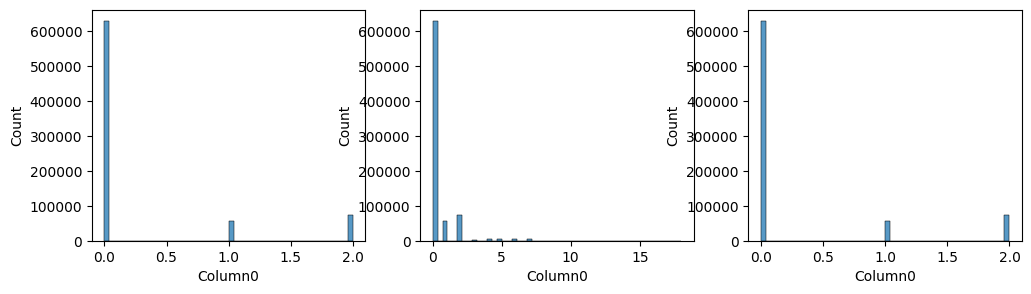

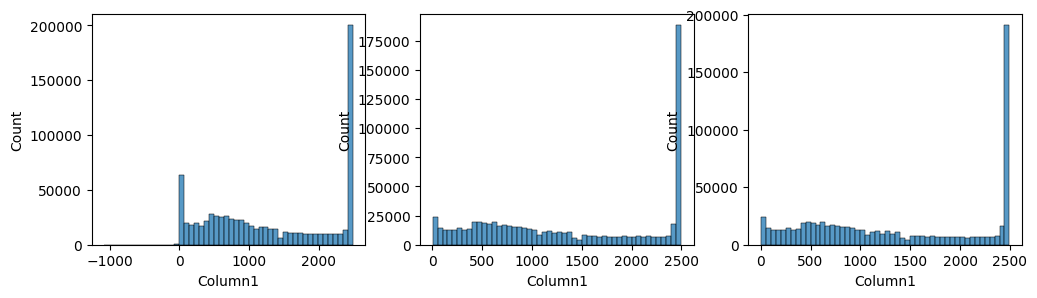

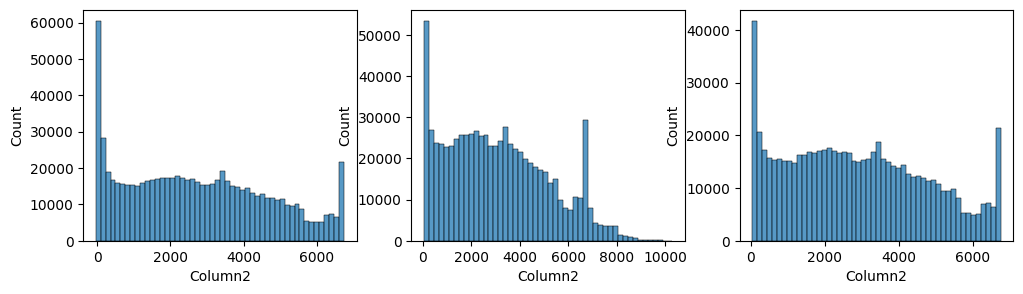

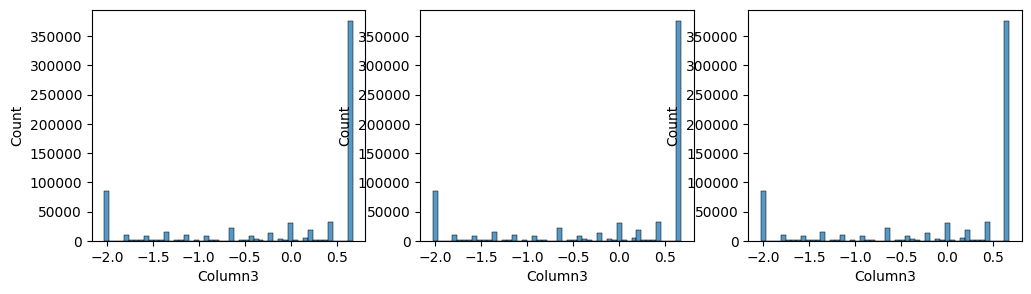

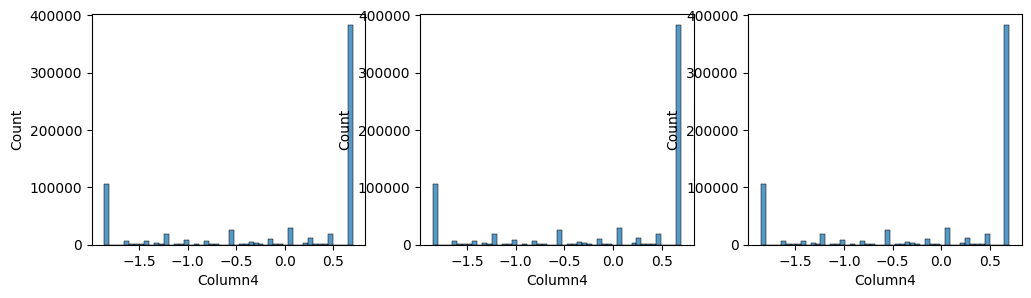

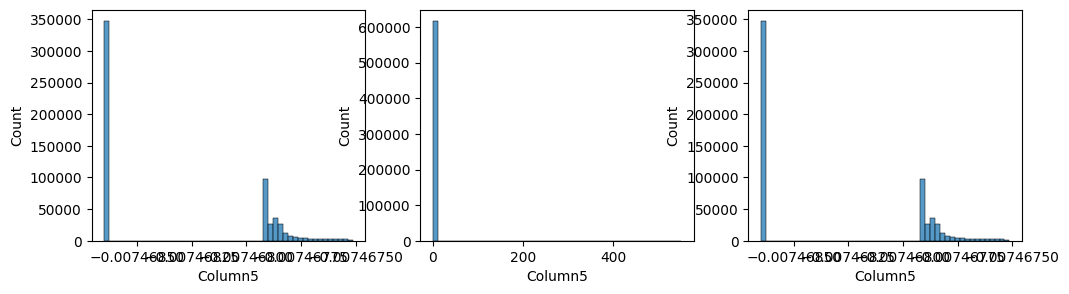

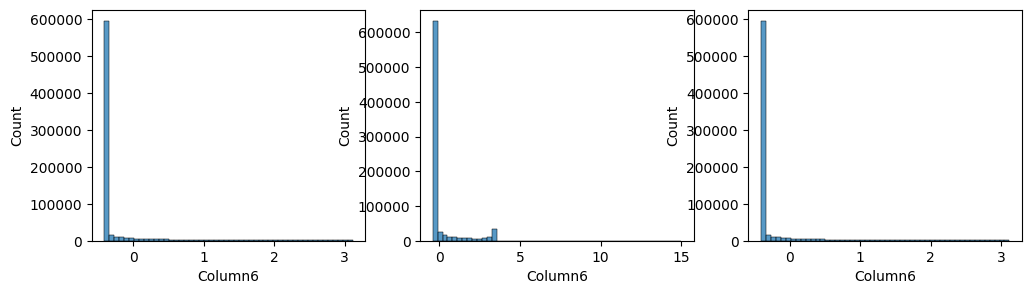

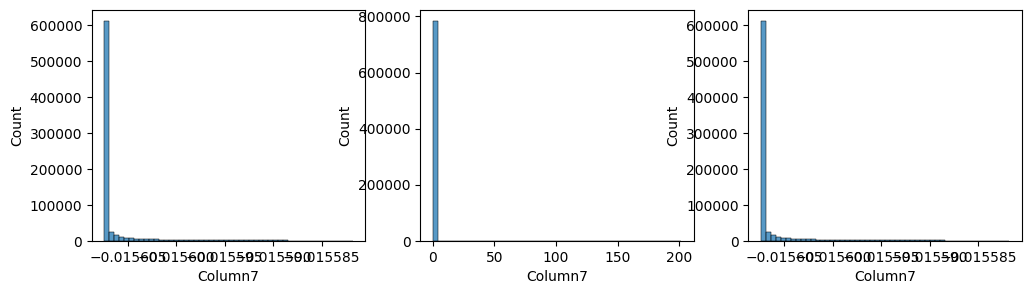

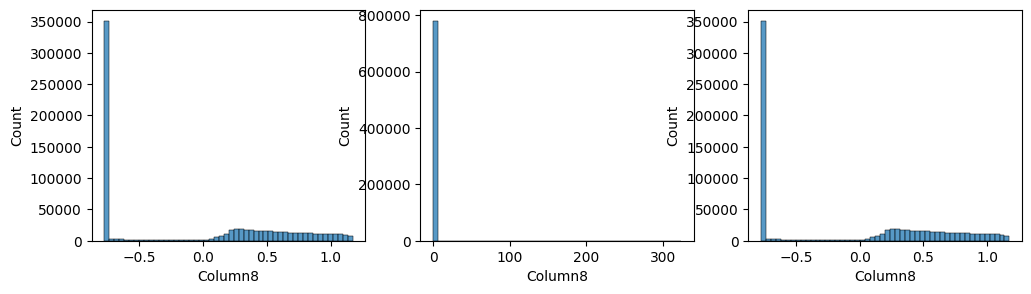

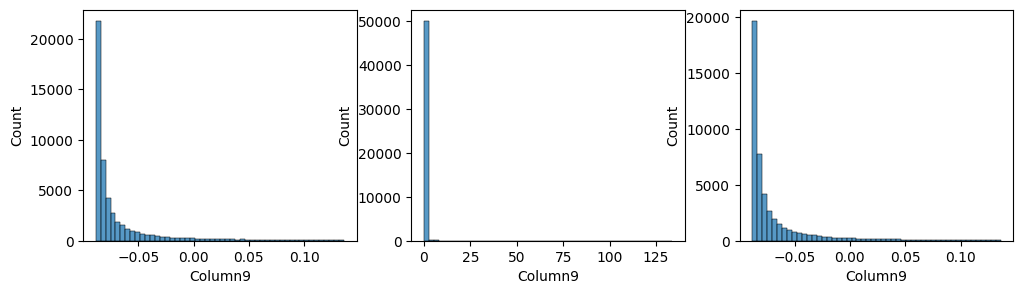

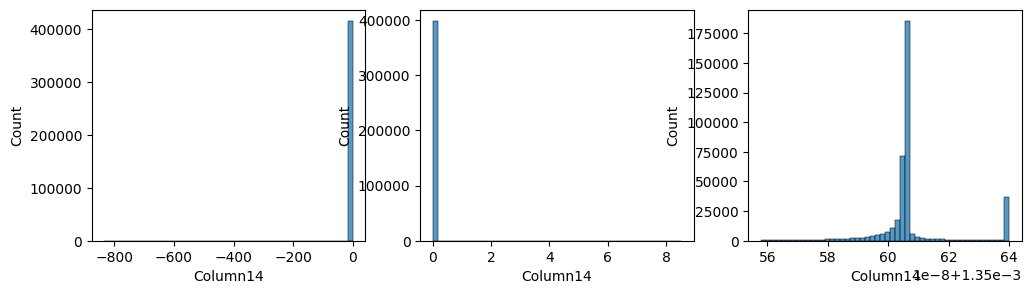

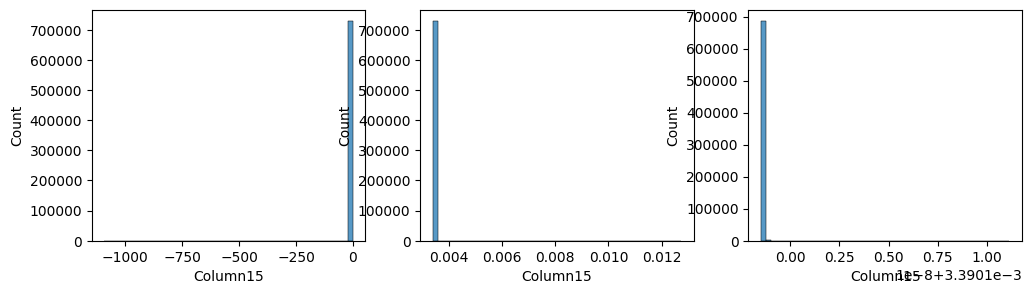

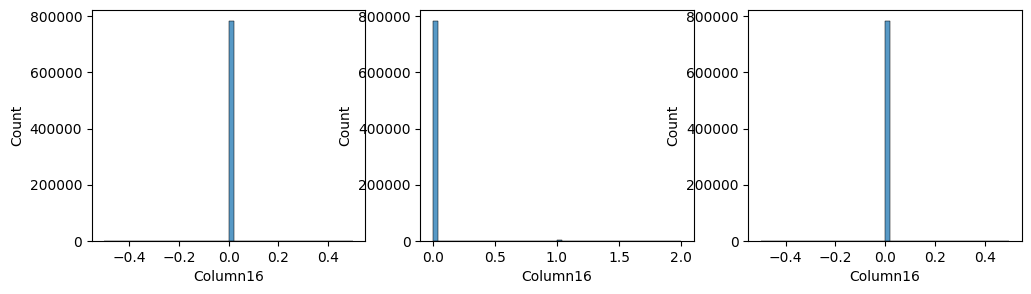

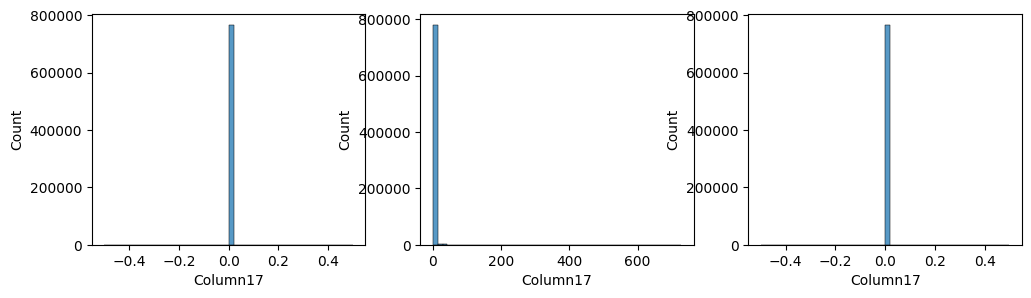

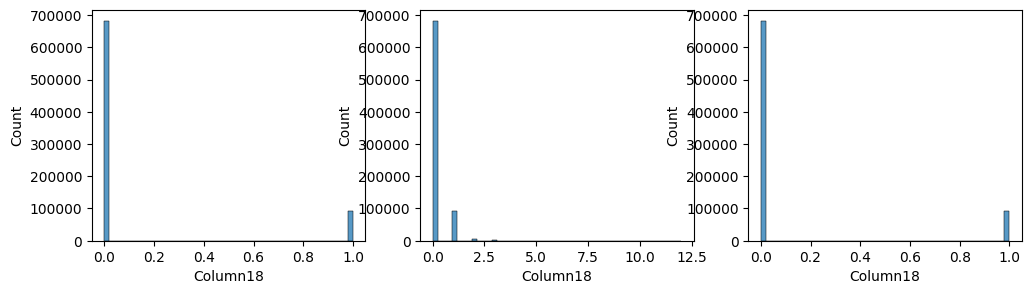

In [59]:
for col in df_train.columns:
    if col == "ID" or df_train[col].nunique() <= 2:
        continue

    max_val = np.nanpercentile(df_train[col].values, 95)
    min_val = np.nanpercentile(df_train[col].values, 5)

    fig, ax = plt.subplots(ncols=3, figsize=(12,3))
    sns.histplot(data=df_train[df_train[col] <= max_val], x=col, bins=50, ax=ax[0])
    sns.histplot(data=df_train[df_train[col] >= min_val], x=col, bins=50, ax=ax[1])
    sns.histplot(data=df_train[(df_train[col] >= min_val) & (df_train[col] <= max_val)], x=col, bins=50, ax=ax[2])
    plt.show()

In [51]:
df_train["Column7"].min(), df_train["Column7"].max()

(np.float64(-0.0156074272276953), np.float64(201.6879465072102))

In [52]:
q = 89.54
print(f"Column9 value at {q} percentile: {}")
q = 99.77
print(f"Column9 value at {q} percentile: {np.nanpercentile(df_train["Column7"].values, q)}")

Column9 value at 89.54 percentile: -0.015601673324099315
Column9 value at 99.77 percentile: 0.2017840659826423


In [66]:
df_train.drop(["ID", "Column1", "Column2"], axis=1).drop_duplicates()

,Column0,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,...,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target
0,2.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,NaN,0,0,...,0,0.001351,0.003390,0.0,0,0.0,0,0,0,0
1,0.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,NaN,0,0,...,0,0.001351,0.003390,0.0,0,0.0,0,0,0,0
2,2.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,NaN,1,1,...,1,0.001351,0.003390,0.0,0,0.0,0,0,0,0
3,0.0,NaN,NaN,NaN,-0.407939,-0.015607,-0.774979,NaN,0,0,...,0,NaN,0.003390,0.0,0,1.0,0,0,0,1
4,0.0,-2.028572,-1.855728,NaN,-0.407939,-0.015607,-0.774979,NaN,0,0,...,0,NaN,0.003390,0.0,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785126,0.0,0.227021,0.275215,-0.007469,-0.407939,-0.015607,0.870313,NaN,0,0,...,0,NaN,0.003391,0.0,0,1.0,0,0,0,1
785129,0.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.509591,NaN,1,1,...,1,0.001351,0.003390,0.0,0,0.0,0,0,0,0
785130,0.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.218972,NaN,0,0,...,1,0.001351,0.003390,0.0,0,0.0,0,0,0,0
785131,0.0,0.001462,0.062121,-0.007468,-0.407939,-0.015607,0.400071,NaN,1,1,...,1,0.001351,0.003390,0.0,0,0.0,0,0,0,0


<Axes: xlabel='Column1', ylabel='Column2'>

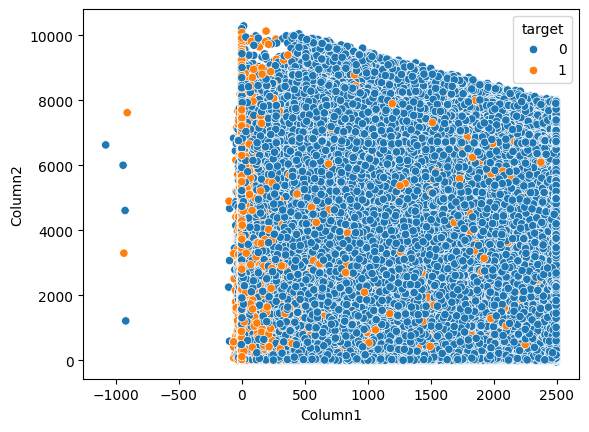

In [67]:
sns.scatterplot(data=df_train, x="Column1", y="Column2", hue="target")

<Axes: ylabel='Count'>

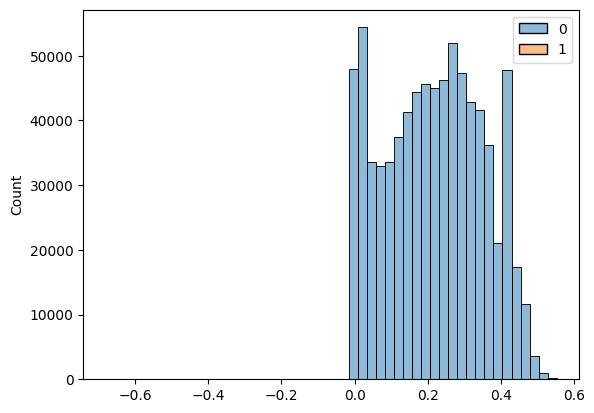

In [70]:
histdata = (df_train["Column2"] - df_train["Column2"].min()) / (df_train["Column2"].max() - df_train["Column2"].min()) + 1
sns.histplot(data=boxcox(histdata), bins=50)

In [73]:
boxcox((df_train["Column1"] - df_train["Column1"].min()) / (df_train["Column1"].max() - df_train["Column1"].min()) + 1)[0].shape

(785133,)

In [27]:
pd.crosstab(df_train["Column16"], df_train["target"]).div(pd.crosstab(df_train["Column13"], df_train["target"]).sum(axis=0)).round(2)

target,0,1
Column16,,
0.0,1.0,0.99
1.0,0.0,0.01
2.0,0.0,0.00


In [72]:
pd.crosstab(df_train["Column19"], df_train["target"])

target,0,1
Column19,,
0,705811,64594
1,5289,9439


In [30]:
pd.crosstab(df_test["Column16"], df_test["target"])

target,0,1
Column16,,
0.0,236981,24425
1.0,53,253


In [33]:
pd.set_option('display.max_columns', None)
df_test[df_test["ID"].isin(['14c902b079f29d256000b79ce2a6c79e', '5232ec94fa314b64dea157bf1663caf6'])]

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target
4805,5232ec94fa314b64dea157bf1663caf6,0.0,0,2224.0,NaN,NaN,-0.007469,-0.407939,-0.015607,-0.774979,NaN,0,0,0,0,NaN,NaN,1.0,25,1.0,0,0,0,0
4960,14c902b079f29d256000b79ce2a6c79e,0.0,3,5607.0,NaN,NaN,-0.007469,-0.407939,-0.015607,-0.774979,NaN,0,0,0,0,NaN,0.00339,1.0,12,1.0,0,0,0,1


In [36]:
df_train[(df_train["Column17"]==25) & (df_train["target"]==0)]

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target
21874,81f8cf0a64f5f67685d763f1a5684da3,0.0,0,1552.0,NaN,NaN,-0.007469,-0.407939,-0.015607,-0.774979,NaN,0,0,0,0,NaN,0.00339,1.0,25,1.0,0,0,0,0
166217,22ed364f411bb0f46b465c4018d6b59d,0.0,0,1555.0,NaN,NaN,-0.007468,-0.407939,-0.015607,0.401024,NaN,0,0,0,0,NaN,0.00339,0.0,25,1.0,1,0,0,0
289151,172c7044254c6a35facefef0bc00e373,0.0,0,2.0,NaN,NaN,-0.007469,-0.407939,-0.015607,-0.774979,NaN,0,0,0,0,NaN,0.00339,0.0,25,0.0,0,0,0,0
297397,82629886f775538da53b304de4518d17,0.0,0,392.0,NaN,NaN,-0.007469,-0.407939,-0.015607,-0.774979,NaN,0,1,0,1,NaN,0.00339,0.0,25,2.0,0,0,0,0
349349,131d9b38c1c8ab771664bf5b2291667e,0.0,0,2264.0,NaN,NaN,-0.007469,-0.407939,-0.015607,-0.774979,NaN,0,0,0,0,NaN,NaN,0.0,25,0.0,0,0,0,0
355447,327677c1632df576ba902fec7c25a497,0.0,0,1599.0,NaN,NaN,-0.007468,-0.407939,-0.015607,-0.774979,NaN,0,0,1,1,NaN,0.00339,0.0,25,0.0,0,0,0,0
619066,f4490a815fe8d224c50ad0ddcd6637f7,0.0,0,26.0,NaN,NaN,-0.007469,-0.407939,-0.015607,-0.774979,NaN,0,1,0,0,NaN,0.00339,0.0,25,1.0,1,0,0,0
648409,9ff3e13f8a795f038c4076f6661591ef,0.0,0,2872.0,NaN,NaN,NaN,-0.407939,-0.015607,1.091586,NaN,0,0,0,0,NaN,0.00339,0.0,25,0.0,0,0,0,0


<Axes: xlabel='Column19', ylabel='Column2'>

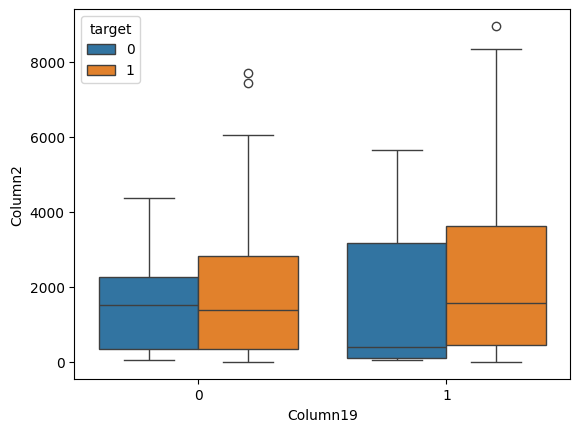

In [82]:
sns.boxplot(data=df_train[(df_train['Column18']!=0) & (df_train['Column17']>0) & (df_train['Column16']>0)], x='Column19', y='Column2', hue='target')

In [74]:
df_train[(df_train["Column17"]==25) & (df_train["target"]==1) & (df_train["Column16"]==1)]

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target
35079,3a0fe6c5d030e880f2b7312fdf7ba8f0,0.0,0,167.0,NaN,NaN,-0.007469,-0.407939,-0.015607,-0.774979,NaN,0,0,0,0,NaN,0.00339,1.0,25,1.0,1,0,0,1
254507,0f7d95a16437ba9d0dd2f3c139d0e3a7,1.0,1,210.0,NaN,NaN,-0.007468,-0.407939,-0.015607,0.357437,NaN,0,0,0,0,NaN,0.00339,1.0,25,1.0,1,1,1,1
617053,b452f17c9835707ec7b14d667c51eae5,0.0,1,1812.0,NaN,NaN,-0.007469,-0.407939,-0.015607,-0.774979,NaN,0,0,0,1,NaN,0.00339,1.0,25,1.0,0,0,0,1
672929,20ee0cfaa0038154eaec4aabbc809b28,2.0,0,347.0,NaN,NaN,-0.007468,-0.407939,-0.015607,0.881167,NaN,0,0,1,0,NaN,0.00339,1.0,25,1.0,0,0,0,1
747765,7c163cdc1e38ec1889fbe2ab875c3e68,0.0,1,2132.0,NaN,NaN,-0.007468,-0.407939,-0.015607,1.107467,NaN,0,0,0,0,NaN,0.00339,1.0,25,1.0,0,0,0,1


In [83]:
df_test[(df_test["Column17"]==25) & (df_test["Column16"]==1)]

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target
4805,5232ec94fa314b64dea157bf1663caf6,0.0,0,2224.0,NaN,NaN,-0.007469,-0.407939,-0.015607,-0.774979,NaN,0,0,0,0,NaN,NaN,1.0,25,1.0,0,0,0,0
27853,61387d03fa3449f051daa4641ac72251,0.0,0,483.0,NaN,NaN,-0.007469,-0.407939,-0.015607,-0.774979,NaN,0,0,0,0,NaN,0.00339,1.0,25,1.0,0,0,0,1


In [68]:
x3 = pd.merge(x, x2, left_index=True, right_index=True)
x3[x3.index.str.endswith('1.0')].sort_index(key= lambda x: x.str.split('-').str[0].astype(int))

target,0_x,1_x,0_y,1_y
row_0,,,,
0-1.0,134,172,42,68
1-1.0,4,57,1,19
2-1.0,3,58,3,12
3-1.0,3,48,1,12
4-1.0,1,32,0,9
5-1.0,0,32,0,13
6-1.0,2,26,0,10
7-1.0,2,30,1,1
8-1.0,2,20,1,8


In [86]:
df_train[df_train['Column18']!=0][['Column15', 'target']].corr()

,Column15,target
Column15,1.000000,-0.002934
target,-0.002934,1.000000


In [95]:
df_train.loc[(~df_train["Column15"].isna()) & (df_train['Column18']!=0), 'target'].value_counts()

target
1    66840
0    26849
Name: count, dtype: int64

In [96]:
df_train['Column15'].describe()

count    768677.000000
mean         -0.000837
std           1.283393
min       -1091.545904
25%           0.003390
50%           0.003390
75%           0.003390
max           0.012736
Name: Column15, dtype: float64

In [102]:
print(df_train.loc[df_train['Column15'] < 0, 'Column15'].nunique())

4885


<Axes: xlabel='Column15', ylabel='Density'>

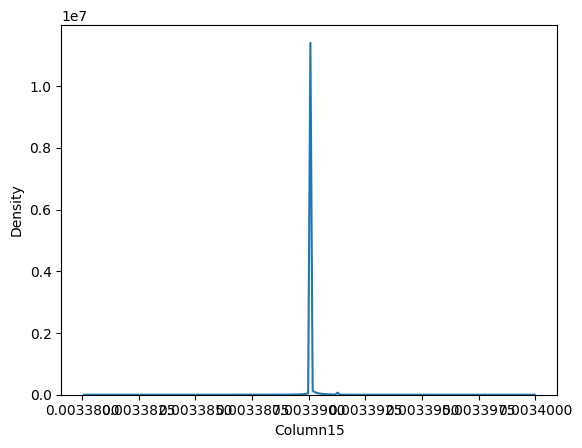

In [18]:
sns.kdeplot(df_train[(df_train['Column15']>0.00338) & (df_train['Column15']<0.0034)]['Column15'])

In [21]:
# Make 3 categories to check its relationship with target
df_train["column15_category"] = "NA"
df_train.loc[(df_train["Column15"]<0.00338), "column15_category"] = "x<0.00338"
df_train.loc[(df_train["Column15"]>=0.00338) & (df_train["Column15"]<0.0034), "column15_category"] = "0.00338<=x<0.0034"
df_train.loc[(df_train["Column15"]>=0.0034), "column15_category"] = "x>=0.0034"
print(pd.crosstab(df_train[df_train['Column18']!=0]["column15_category"], df_train[df_train['Column18']!=0]["target"]).to_markdown())
del df_train["column15_category"];

| column15_category   |     0 |     1 |
|:--------------------|------:|------:|
| 0.00338<=x<0.0034   | 26637 | 66312 |
| NA                  |  1525 |  7193 |
| x<0.00338           |   210 |   525 |
| x>=0.0034           |     2 |     3 |


In [22]:
# Make 3 categories to check its relationship with target
df_test["column15_category"] = "NA"
df_test.loc[(df_test["Column15"]<0.00338), "column15_category"] = "x<0.00338"
df_test.loc[(df_test["Column15"]>=0.00338) & (df_test["Column15"]<0.0034), "column15_category"] = "0.00338<=x<0.0034"
df_test.loc[(df_test["Column15"]>=0.0034), "column15_category"] = "x>=0.0034"
print(pd.crosstab(df_test[df_test['Column18']!=0]["column15_category"], df_test[df_test['Column18']!=0]["target"]).to_markdown())
del df_test["column15_category"];

| column15_category   |    0 |     1 |
|:--------------------|-----:|------:|
| 0.00338<=x<0.0034   | 9003 | 22091 |
| NA                  |  473 |  2426 |
| x<0.00338           |   74 |   160 |
| x>=0.0034           |    1 |     1 |


In [27]:
df_train['modified15'] = (df_train['Column15'] - df_train['Column15'].mean()) / df_train['Column15'].std()

<Axes: xlabel='modified15', ylabel='Density'>

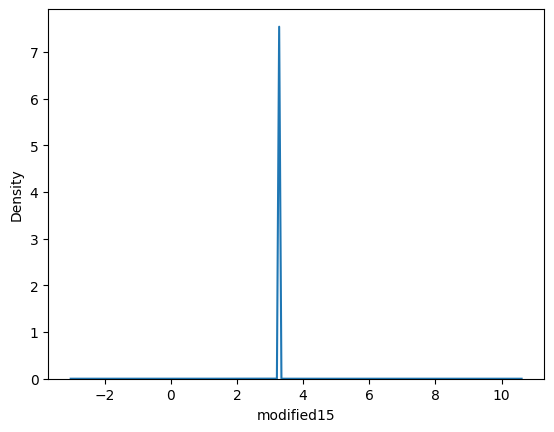

In [31]:
sns.kdeplot(df_train[df_train['modified15']>-0.003]['modified15'])